In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [59]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [60]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [61]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [62]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [63]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [64]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [65]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [66]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [67]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [68]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [69]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [70]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:07, 15.12it/s]                                                                                                                                     


Epoch 1 of 100
Generator loss: 5.05893714, Discriminator loss: 0.43875778


118it [00:07, 16.18it/s]                                                                                                                                     


Epoch 2 of 100
Generator loss: 6.80569473, Discriminator loss: 0.31419855


118it [00:07, 15.63it/s]                                                                                                                                     


Epoch 3 of 100
Generator loss: 8.18088959, Discriminator loss: 0.53847389


118it [00:07, 15.50it/s]                                                                                                                                     


Epoch 4 of 100
Generator loss: 6.97897664, Discriminator loss: 0.21202851


118it [00:07, 15.96it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


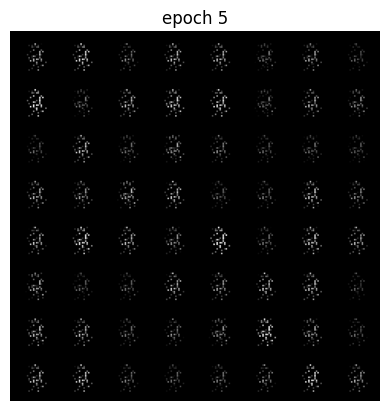

Epoch 5 of 100
Generator loss: 7.71326294, Discriminator loss: 0.15735682


118it [00:07, 15.41it/s]                                                                                                                                     


Epoch 6 of 100
Generator loss: 7.84414505, Discriminator loss: 0.06001936


118it [00:07, 15.76it/s]                                                                                                                                     


Epoch 7 of 100
Generator loss: 8.79390091, Discriminator loss: 0.11149483


118it [00:07, 15.60it/s]                                                                                                                                     


Epoch 8 of 100
Generator loss: 8.86458028, Discriminator loss: 0.12706657


118it [00:07, 15.50it/s]                                                                                                                                     


Epoch 9 of 100
Generator loss: 8.05160948, Discriminator loss: 0.16967103


118it [00:07, 15.34it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


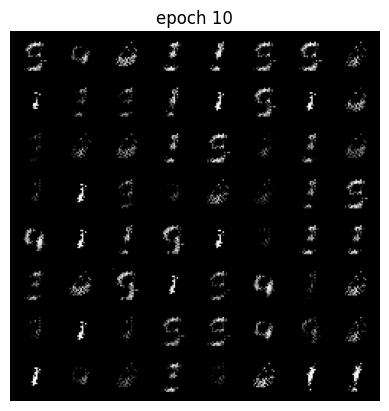

Epoch 10 of 100
Generator loss: 7.70101996, Discriminator loss: 0.10286940


118it [00:07, 15.31it/s]                                                                                                                                     


Epoch 11 of 100
Generator loss: 8.39140889, Discriminator loss: 0.18066171


118it [00:08, 14.43it/s]                                                                                                                                     


Epoch 12 of 100
Generator loss: 8.18351540, Discriminator loss: 0.18798518


118it [00:08, 14.42it/s]                                                                                                                                     


Epoch 13 of 100
Generator loss: 7.35430039, Discriminator loss: 0.20149311


118it [00:07, 15.60it/s]                                                                                                                                     


Epoch 14 of 100
Generator loss: 7.00176590, Discriminator loss: 0.20864519


118it [00:07, 14.96it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


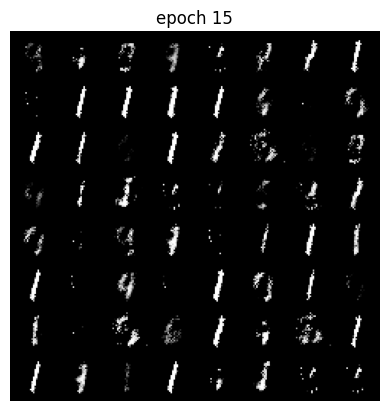

Epoch 15 of 100
Generator loss: 7.11992757, Discriminator loss: 0.23438117


118it [00:08, 14.02it/s]                                                                                                                                     


Epoch 16 of 100
Generator loss: 6.29757320, Discriminator loss: 0.32443585


118it [00:08, 14.13it/s]                                                                                                                                     


Epoch 17 of 100
Generator loss: 6.16257928, Discriminator loss: 0.24826299


118it [00:08, 14.55it/s]                                                                                                                                     


Epoch 18 of 100
Generator loss: 6.38716926, Discriminator loss: 0.25063031


118it [00:08, 13.62it/s]                                                                                                                                     


Epoch 19 of 100
Generator loss: 5.96105215, Discriminator loss: 0.29074559


118it [00:08, 14.57it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


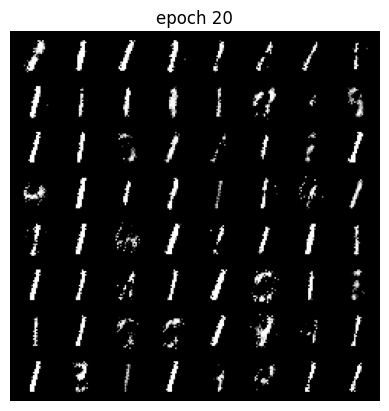

Epoch 20 of 100
Generator loss: 5.57193177, Discriminator loss: 0.31458055


118it [00:07, 15.80it/s]                                                                                                                                     


Epoch 21 of 100
Generator loss: 5.74021938, Discriminator loss: 0.30375997


118it [00:07, 15.92it/s]                                                                                                                                     


Epoch 22 of 100
Generator loss: 5.40321072, Discriminator loss: 0.34393955


118it [00:07, 16.01it/s]                                                                                                                                     


Epoch 23 of 100
Generator loss: 5.46845428, Discriminator loss: 0.34958245


118it [00:07, 15.95it/s]                                                                                                                                     


Epoch 24 of 100
Generator loss: 4.93466038, Discriminator loss: 0.37835653


118it [00:07, 16.00it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


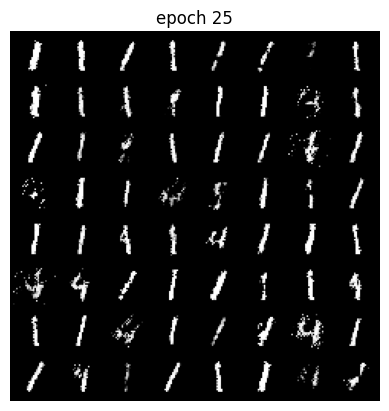

Epoch 25 of 100
Generator loss: 4.58158525, Discriminator loss: 0.40711868


118it [00:07, 15.94it/s]                                                                                                                                     


Epoch 26 of 100
Generator loss: 4.37496545, Discriminator loss: 0.45276193


118it [00:07, 16.00it/s]                                                                                                                                     


Epoch 27 of 100
Generator loss: 4.12961201, Discriminator loss: 0.49285953


118it [00:07, 16.11it/s]                                                                                                                                     


Epoch 28 of 100
Generator loss: 3.85242958, Discriminator loss: 0.51324656


118it [00:07, 15.81it/s]                                                                                                                                     


Epoch 29 of 100
Generator loss: 3.81275727, Discriminator loss: 0.54620378


118it [00:07, 15.78it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


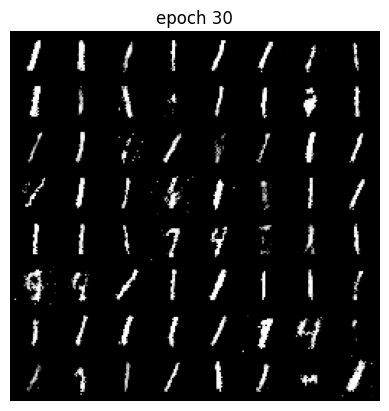

Epoch 30 of 100
Generator loss: 3.46308597, Discriminator loss: 0.59406188


118it [00:07, 15.91it/s]                                                                                                                                     


Epoch 31 of 100
Generator loss: 3.45524076, Discriminator loss: 0.61135023


118it [00:07, 15.98it/s]                                                                                                                                     


Epoch 32 of 100
Generator loss: 3.49948771, Discriminator loss: 0.60113475


118it [00:07, 16.07it/s]                                                                                                                                     


Epoch 33 of 100
Generator loss: 3.50459181, Discriminator loss: 0.62634325


118it [00:07, 15.67it/s]                                                                                                                                     


Epoch 34 of 100
Generator loss: 3.26344631, Discriminator loss: 0.65674359


118it [00:07, 16.00it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


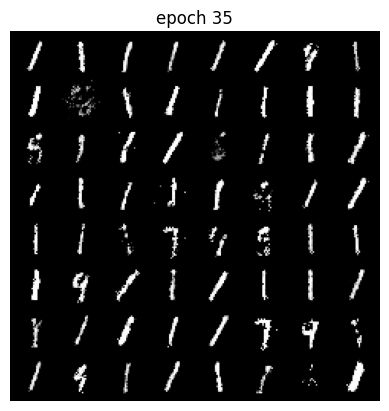

Epoch 35 of 100
Generator loss: 3.25299702, Discriminator loss: 0.66380585


118it [00:07, 16.01it/s]                                                                                                                                     


Epoch 36 of 100
Generator loss: 3.24662845, Discriminator loss: 0.65508016


118it [00:08, 14.75it/s]                                                                                                                                     


Epoch 37 of 100
Generator loss: 3.28541032, Discriminator loss: 0.61955849


118it [00:08, 14.33it/s]                                                                                                                                     


Epoch 38 of 100
Generator loss: 3.25476767, Discriminator loss: 0.65249944


118it [00:08, 14.58it/s]                                                                                                                                     


Epoch 39 of 100
Generator loss: 3.36564026, Discriminator loss: 0.63296970


118it [00:07, 15.95it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


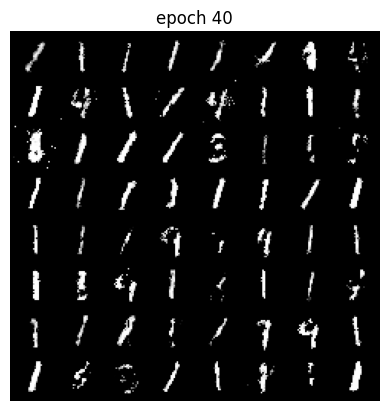

Epoch 40 of 100
Generator loss: 3.25054247, Discriminator loss: 0.66989006


118it [00:07, 15.49it/s]                                                                                                                                     


Epoch 41 of 100
Generator loss: 3.16007254, Discriminator loss: 0.71560960


118it [00:07, 15.90it/s]                                                                                                                                     


Epoch 42 of 100
Generator loss: 3.14219062, Discriminator loss: 0.71401973


118it [00:07, 15.68it/s]                                                                                                                                     


Epoch 43 of 100
Generator loss: 3.11114681, Discriminator loss: 0.70459976


118it [00:07, 15.64it/s]                                                                                                                                     


Epoch 44 of 100
Generator loss: 3.32806319, Discriminator loss: 0.69862610


118it [00:07, 15.55it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


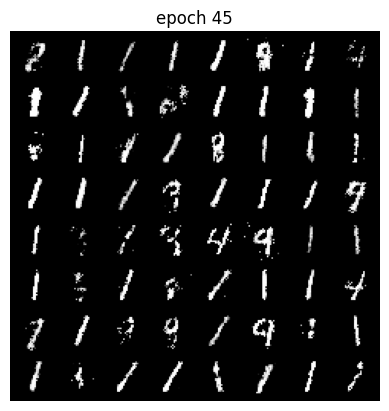

Epoch 45 of 100
Generator loss: 3.34906129, Discriminator loss: 0.70547911


118it [00:07, 15.34it/s]                                                                                                                                     


Epoch 46 of 100
Generator loss: 3.36604631, Discriminator loss: 0.70254746


118it [00:07, 15.75it/s]                                                                                                                                     


Epoch 47 of 100
Generator loss: 3.29257409, Discriminator loss: 0.68065439


118it [00:07, 15.92it/s]                                                                                                                                     


Epoch 48 of 100
Generator loss: 3.33583080, Discriminator loss: 0.68066454


118it [00:07, 15.92it/s]                                                                                                                                     


Epoch 49 of 100
Generator loss: 3.33490244, Discriminator loss: 0.66754272


118it [00:07, 16.17it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


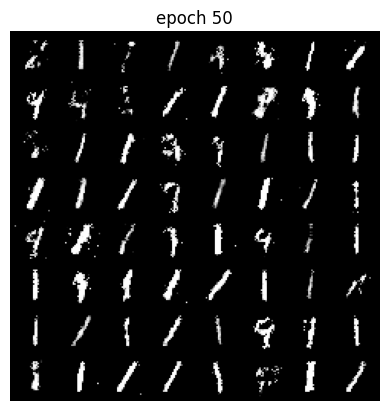

Epoch 50 of 100
Generator loss: 3.49100554, Discriminator loss: 0.66041809


118it [00:07, 16.17it/s]                                                                                                                                     


Epoch 51 of 100
Generator loss: 3.27071200, Discriminator loss: 0.67688856


118it [00:07, 16.10it/s]                                                                                                                                     


Epoch 52 of 100
Generator loss: 3.25545143, Discriminator loss: 0.70209693


118it [00:07, 16.18it/s]                                                                                                                                     


Epoch 53 of 100
Generator loss: 3.22325509, Discriminator loss: 0.67323628


118it [00:07, 16.13it/s]                                                                                                                                     


Epoch 54 of 100
Generator loss: 3.22267838, Discriminator loss: 0.75043670


118it [00:07, 16.14it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


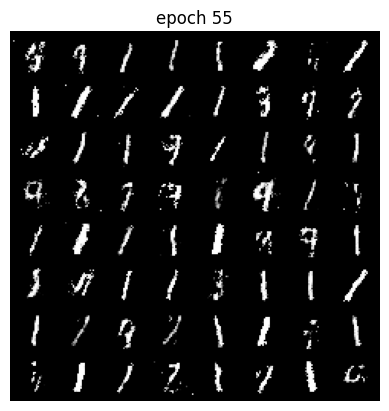

Epoch 55 of 100
Generator loss: 3.03732121, Discriminator loss: 0.78265935


118it [00:07, 15.93it/s]                                                                                                                                     


Epoch 56 of 100
Generator loss: 3.09514746, Discriminator loss: 0.76844724


118it [00:07, 16.07it/s]                                                                                                                                     


Epoch 57 of 100
Generator loss: 3.13303252, Discriminator loss: 0.78730178


118it [00:07, 16.34it/s]                                                                                                                                     


Epoch 58 of 100
Generator loss: 3.02101128, Discriminator loss: 0.78448326


118it [00:07, 16.46it/s]                                                                                                                                     


Epoch 59 of 100
Generator loss: 3.20839175, Discriminator loss: 0.72017716


118it [00:07, 16.23it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


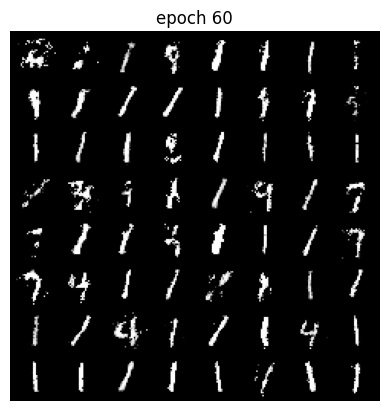

Epoch 60 of 100
Generator loss: 3.13011890, Discriminator loss: 0.73979135


118it [00:07, 16.45it/s]                                                                                                                                     


Epoch 61 of 100
Generator loss: 3.25797599, Discriminator loss: 0.69977184


118it [00:07, 16.48it/s]                                                                                                                                     


Epoch 62 of 100
Generator loss: 3.17495644, Discriminator loss: 0.76680297


118it [00:07, 16.50it/s]                                                                                                                                     


Epoch 63 of 100
Generator loss: 3.00765132, Discriminator loss: 0.79478042


118it [00:07, 16.46it/s]                                                                                                                                     


Epoch 64 of 100
Generator loss: 3.08602172, Discriminator loss: 0.77159070


118it [00:07, 16.41it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


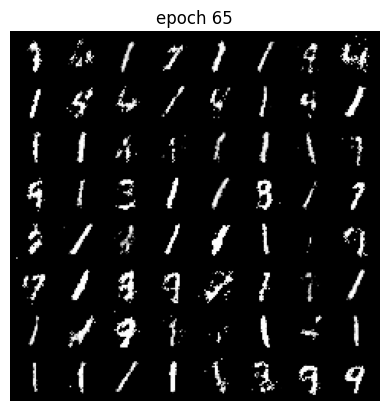

Epoch 65 of 100
Generator loss: 3.16488945, Discriminator loss: 0.78312498


118it [00:07, 15.96it/s]                                                                                                                                     


Epoch 66 of 100
Generator loss: 3.22028708, Discriminator loss: 0.77212492


118it [00:07, 16.35it/s]                                                                                                                                     


Epoch 67 of 100
Generator loss: 3.05041558, Discriminator loss: 0.81180293


118it [00:07, 16.28it/s]                                                                                                                                     


Epoch 68 of 100
Generator loss: 3.15440479, Discriminator loss: 0.77949188


118it [00:07, 16.36it/s]                                                                                                                                     


Epoch 69 of 100
Generator loss: 3.07646502, Discriminator loss: 0.82007064


118it [00:07, 16.35it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


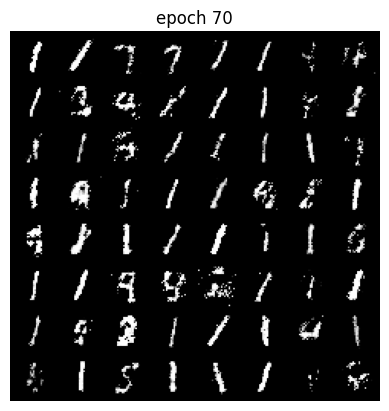

Epoch 70 of 100
Generator loss: 3.04654923, Discriminator loss: 0.80976310


118it [00:07, 16.22it/s]                                                                                                                                     


Epoch 71 of 100
Generator loss: 3.04624383, Discriminator loss: 0.78083709


118it [00:07, 16.35it/s]                                                                                                                                     


Epoch 72 of 100
Generator loss: 3.09691503, Discriminator loss: 0.79279956


118it [00:07, 16.42it/s]                                                                                                                                     


Epoch 73 of 100
Generator loss: 3.11981263, Discriminator loss: 0.82796988


118it [00:07, 16.43it/s]                                                                                                                                     


Epoch 74 of 100
Generator loss: 3.10778476, Discriminator loss: 0.80900469


118it [00:07, 16.37it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


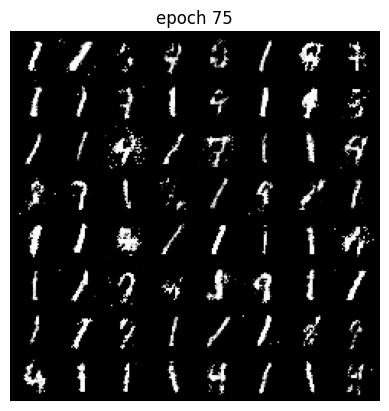

Epoch 75 of 100
Generator loss: 3.04081836, Discriminator loss: 0.82503720


118it [00:07, 16.27it/s]                                                                                                                                     


Epoch 76 of 100
Generator loss: 3.05916934, Discriminator loss: 0.82681948


118it [00:07, 16.42it/s]                                                                                                                                     


Epoch 77 of 100
Generator loss: 3.10878577, Discriminator loss: 0.82285074


118it [00:07, 16.40it/s]                                                                                                                                     


Epoch 78 of 100
Generator loss: 2.98182700, Discriminator loss: 0.87129482


118it [00:07, 16.53it/s]                                                                                                                                     


Epoch 79 of 100
Generator loss: 2.97437512, Discriminator loss: 0.86195775


118it [00:07, 16.56it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


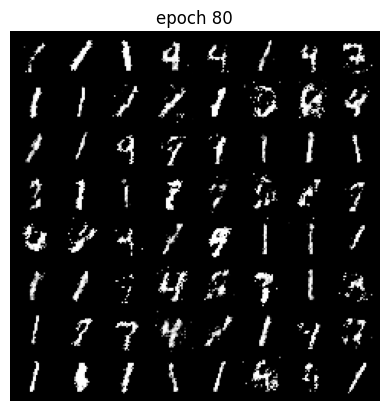

Epoch 80 of 100
Generator loss: 2.88520977, Discriminator loss: 0.89622022


118it [00:07, 16.54it/s]                                                                                                                                     


Epoch 81 of 100
Generator loss: 3.01964615, Discriminator loss: 0.89187946


118it [00:07, 16.54it/s]                                                                                                                                     


Epoch 82 of 100
Generator loss: 2.96850359, Discriminator loss: 0.86832750


118it [00:07, 16.53it/s]                                                                                                                                     


Epoch 83 of 100
Generator loss: 2.95001381, Discriminator loss: 0.89804715


118it [00:07, 16.50it/s]                                                                                                                                     


Epoch 84 of 100
Generator loss: 3.02189132, Discriminator loss: 0.88568034


118it [00:07, 16.54it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


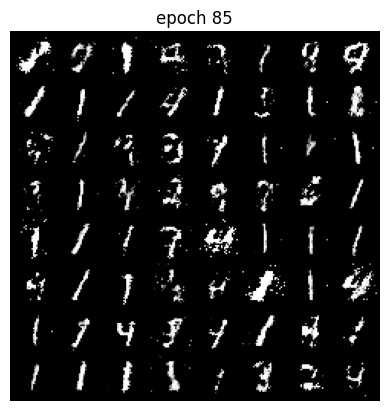

Epoch 85 of 100
Generator loss: 3.07688079, Discriminator loss: 0.82287585


118it [00:07, 16.42it/s]                                                                                                                                     


Epoch 86 of 100
Generator loss: 3.02830057, Discriminator loss: 0.88191755


118it [00:07, 16.43it/s]                                                                                                                                     


Epoch 87 of 100
Generator loss: 2.99782444, Discriminator loss: 0.88504526


118it [00:07, 16.44it/s]                                                                                                                                     


Epoch 88 of 100
Generator loss: 2.97428557, Discriminator loss: 0.86291170


118it [00:07, 16.39it/s]                                                                                                                                     


Epoch 89 of 100
Generator loss: 2.92176389, Discriminator loss: 0.88015918


118it [00:07, 16.36it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


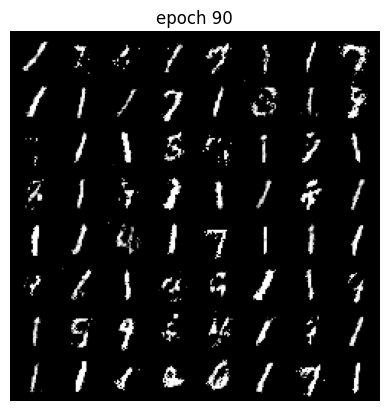

Epoch 90 of 100
Generator loss: 2.81238377, Discriminator loss: 0.90507039


118it [00:07, 16.20it/s]                                                                                                                                     


Epoch 91 of 100
Generator loss: 2.92587901, Discriminator loss: 0.88916281


118it [00:07, 16.34it/s]                                                                                                                                     


Epoch 92 of 100
Generator loss: 2.78438179, Discriminator loss: 0.93533077


118it [00:07, 16.30it/s]                                                                                                                                     


Epoch 93 of 100
Generator loss: 2.85600996, Discriminator loss: 0.93679575


118it [00:07, 16.29it/s]                                                                                                                                     


Epoch 94 of 100
Generator loss: 2.89536107, Discriminator loss: 0.90743179


118it [00:07, 16.38it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


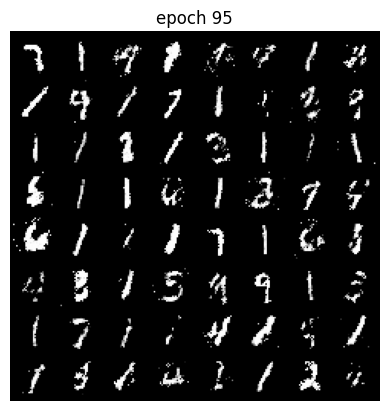

Epoch 95 of 100
Generator loss: 2.92255584, Discriminator loss: 0.90236925


118it [00:07, 16.27it/s]                                                                                                                                     


Epoch 96 of 100
Generator loss: 2.96605956, Discriminator loss: 0.92054755


118it [00:07, 16.27it/s]                                                                                                                                     


Epoch 97 of 100
Generator loss: 3.01775432, Discriminator loss: 0.90028620


118it [00:07, 16.27it/s]                                                                                                                                     


Epoch 98 of 100
Generator loss: 2.92799898, Discriminator loss: 0.94457936


118it [00:07, 16.07it/s]                                                                                                                                     


Epoch 99 of 100
Generator loss: 2.82901965, Discriminator loss: 0.94698895


118it [00:07, 16.15it/s]                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


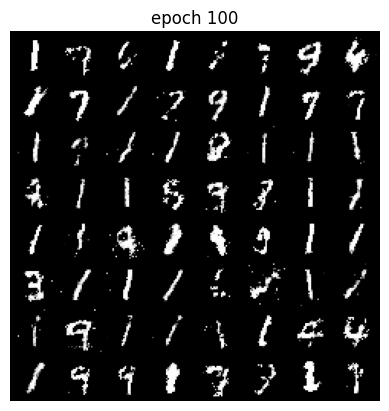

Epoch 100 of 100
Generator loss: 2.81722791, Discriminator loss: 0.91923855


In [73]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    return criterion(output, true_label)
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    return criterion(output, true_label)
    
    ######################################
    
k = 2
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_images = data[0]

        for i in range(k):
            optim_d.zero_grad()
            fake_images = generator(noise)
            true_predictions = discriminator(real_images)
            fake_predictions = discriminator(fake_images)
            discriminator_loss_real = discriminator_loss(true_predictions, label_real(real_images.size(0)))
            discriminator_loss_fake = discriminator_loss(fake_predictions, label_fake(fake_images.size(0)))
            discriminator_loss_fake.backward()
            discriminator_loss_real.backward()
        
            loss_d += discriminator_loss_real.item() + discriminator_loss_fake.item()
            optim_d.step()

        optim_g.zero_grad()
        image_prediction = discriminator(generator(noise))
        generator_loss_fake = generator_loss(image_prediction, label_real(fake_images.size(0)))
        generator_loss_fake.backward()
        optim_g.step()

        loss_g += generator_loss_fake.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [74]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [75]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

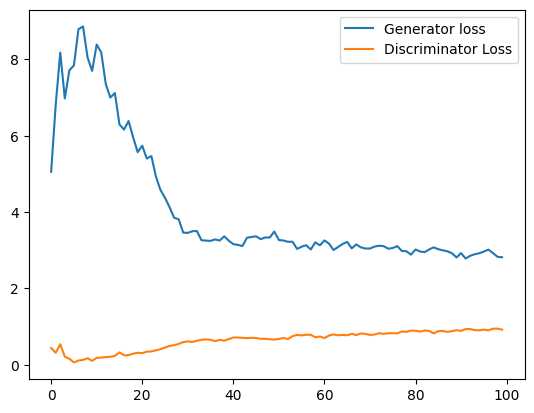

In [76]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')